<a href="https://colab.research.google.com/github/elfrez/sales-predictions/blob/main/15_Proyecto_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


## Importar Dataframe

In [ ]:
filename = '15 - sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Limpieza de datos

## Filas y Columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*   Filas: 8523
*   Columnas: 11

## Limpiar Duplicados

In [ ]:
filas_duplicadas = df[df.duplicated()]
print(filas_duplicadas)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


> No existen duplicados

## Información faltante

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Comprobar y corregir consistencia de las categorías

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat':'Low Fat',
    'LF':'Low Fat',
    'reg':'Regular'
    })
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

## Resumen de datos numéricos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Preprocessing

### Test Train Split

In [ ]:
#Definición de Características y Target
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Selectores

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
cat_columns = cat_selector(X_train)
cat_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
num_selector = make_column_selector(dtype_include='number')
num_columns = num_selector(X_train)
num_columns

['Item_Weight', 'Item_Visibility', 'Item_MRP']

### Transformadores

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

### Pipelines

In [ ]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### ColumnTransformer

In [ ]:
preprocessor = make_column_transformer(
    (numeric_pipe, num_selector),
    (categorical_pipe, cat_selector),
    remainder = 'passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000227E320BF80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000227A1A4C200>)])

### Fit Transform

In [ ]:
preprocessor.fit(X_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# X_train
X_train_processed = pd.DataFrame(X_train_processed)
X_train_processed.columns = preprocessor.get_feature_names_out()
# X_test
X_test_processed = pd.DataFrame(X_test_processed)
X_test_processed.columns = preprocessor.get_feature_names_out()

X_train_processed

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,pipeline-2__Item_Type_Dairy,...,pipeline-2__Outlet_Size_High,pipeline-2__Outlet_Size_Medium,pipeline-2__Outlet_Size_Small,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
0,0.817249,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,4.309657,-0.044657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,1.008625,-1.058907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.920527,1.523027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.227755,-0.383777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Modelos de predicción

## Regresión Lineal

### Evaluar Regresión

In [ ]:
reg = LinearRegression()
reg.fit(X_train_processed, y_train)

reg_train_r2 = reg.score(X_train_processed, y_train)
reg_test_r2 = reg.score(X_test_processed, y_test)
print("Regresión - R2 conjunto train:", reg_train_r2)
print("Regresión - R2 conjunto test:", reg_test_r2)

Regresión - R2 conjunto train: 0.5606153870287736
Regresión - R2 conjunto test: 0.5656025072798097


In [ ]:
# Obtener las predicciones del train y test
reg_train_preds = reg.predict(X_train_processed)
reg_test_preds = reg.predict(X_test_processed)

# RECM
rmse_train = np.sqrt(mean_squared_error(y_train, reg_train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, reg_test_preds))
print("Regresión - RECM conjunto train:", rmse_train)
print("Regresión - RECM conjunto test:", rmse_test)

Regresión - RECM conjunto train: 1140.3242079947659
Regresión - RECM conjunto test: 1094.7569667716948


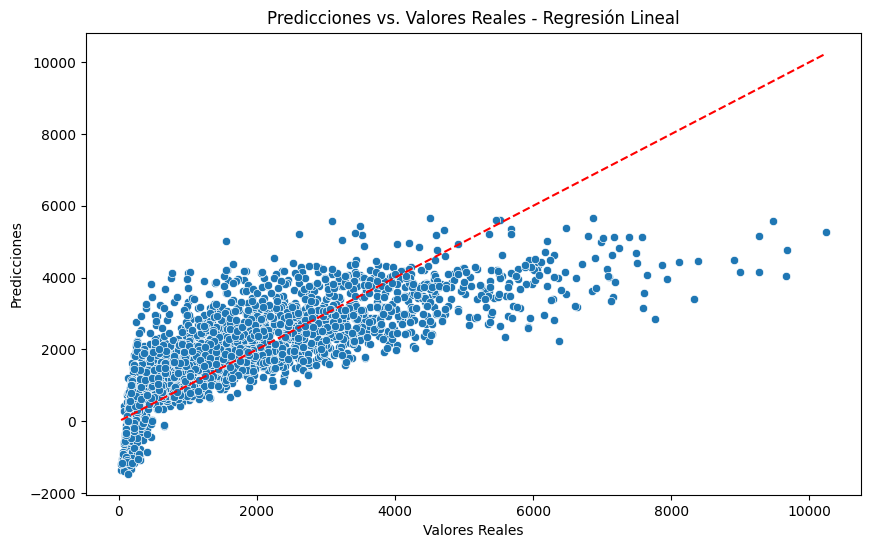

In [ ]:
comparacion_reg = pd.DataFrame({'Real': y_test, 'Predicted': reg_test_preds})

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=comparacion_reg)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales - Regresión Lineal')
plt.show()

## Árbol de decisión

### Evaluar Árbol de decisión

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_processed, y_train)
tree_reg_train_r2 = tree_reg.score(X_train_processed, y_train)
tree_reg_test_r2 = tree_reg.score(X_test_processed, y_test)
print("Tree - R2 conjunto train:", tree_reg_train_r2)
print("Tree - R2 conjunto test", tree_reg_test_r2)

Tree - R2 conjunto train: 1.0
Tree - R2 conjunto test 0.11426093831941997


In [ ]:
tree_default_depth = tree_reg.get_depth()
print("Max depth del modelo default:", tree_reg.get_depth())

Max depth del modelo default: 42


El modelo default está sobreajustado

In [ ]:
tree_params_grid = {
    'max_depth': [x for x in range(1,42)]
}

tree_gridsearch = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=tree_params_grid, cv=5)
tree_gridsearch.fit(X_train_processed, y_train)
best_tree = tree_gridsearch.best_estimator_

best_tree_train_r2 = best_tree.score(X_train_processed, y_train)
best_tree_test_r2 = best_tree.score(X_test_processed, y_test)
print('Tree - Best R2 conjunto train:', best_tree_train_r2)
print('Tree - Best R2 conjunto test:', best_tree_test_r2)
print('Tree - Params:', best_tree.get_params())

Tree - Best R2 conjunto train: 0.6039397477322956
Tree - Best R2 conjunto test: 0.5947099753159973
Tree - Params: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


El mejor max depth para este modelo es 5

In [ ]:
tree_reg_optimo = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg_optimo.fit(X_train_processed, y_train)
tree_reg_optimo_train_r2 = tree_reg_optimo.score(X_train_processed, y_train)
tree_reg_optimo_test_r2 = tree_reg_optimo.score(X_test_processed, y_test)
print("Tree - R2 conjunto train:", tree_reg_optimo_train_r2)
print("Tree - R2 conjunto test", tree_reg_optimo_test_r2)

Tree - R2 conjunto train: 0.6039397477322956
Tree - R2 conjunto test 0.5947099753159973


In [ ]:
# Obtener las predicciones del train y test
tree_train_preds = tree_reg_optimo.predict(X_train_processed)
tree_test_preds = tree_reg_optimo.predict(X_test_processed)

# RECM
rmse_train_tree = np.sqrt(mean_squared_error(y_train, tree_train_preds))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, tree_test_preds))
print("Tree - RECM conjunto train:", rmse_train_tree)
print("Tree - RECM conjunto test:", rmse_test_tree)

Tree - RECM conjunto train: 1082.6461900869947
Tree - RECM conjunto test: 1057.4431299496732


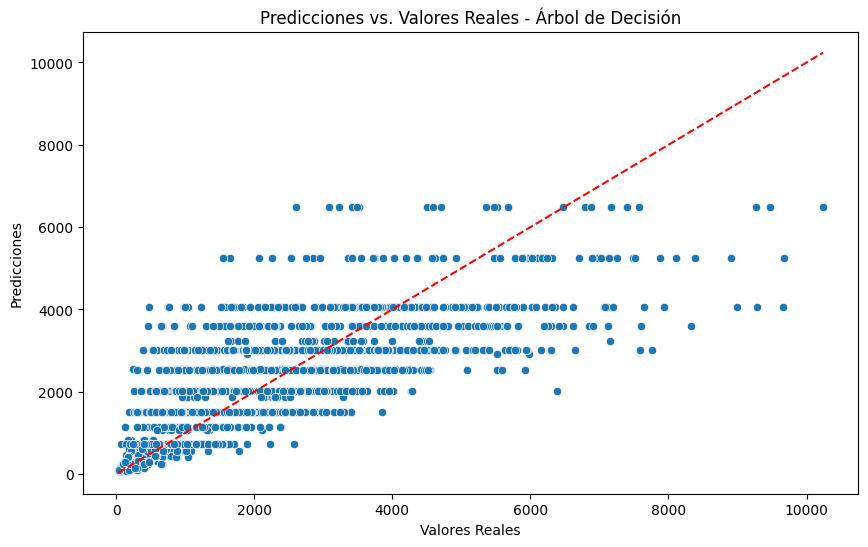

In [ ]:
comparacion_tree = pd.DataFrame({'Real': y_test, 'Predicted': tree_test_preds})

# Gráfico de dispersión de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=comparacion_tree)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales - Árbol de Decisión')
plt.show()